<a href="https://colab.research.google.com/github/brsingh7/Data620_Spring24/blob/Project1/BrianSingh_Data620_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [102]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import ttest_ind

Import Data
Data was downloaded from https://github.com/fivethirtyeight/data/tree/master/sports-political-donations

sports-political-donations.csv contains every confirmed partisan political contribution from team owners and commissioners in the NFL, NBA, WNBA, NHL, MLB and NASCAR. Only contributions while owners were involved with the team are included. The data is from the Federal Election Commission and OpenSecrets.

In [13]:
url = 'https://raw.githubusercontent.com/brsingh7/Data620_Spring24/Project1/sports_political_donations.csv'
sports_donations = pd.read_csv(url)
sports_donations.head()

,Owner,Team,League,Recipient,Amount,Election Year,Party
0,Adam Silver,Commissioner,NBA,WRIGHT 2016,"$4,000",2016,Democrat
1,Adam Silver,Commissioner,NBA,BIDEN FOR PRESIDENT,"$2,800",2020,Democrat
2,Adam Silver,Commissioner,NBA,CORY 2020,"$2,700",2020,Democrat
3,Adam Silver,Commissioner,NBA,Kamala Harris for the People,"$2,700",2020,Democrat
4,Adam Silver,Commissioner,NBA,Win The Era PAC,"$2,700",2020,Democrat


In [16]:
#convert amount from string to float
print(sports_donations.dtypes)
sports_donations['Amount'] = sports_donations['Amount'].replace('[\$,]', '', regex=True).astype(int)

Owner            object
Team             object
League           object
Recipient        object
Amount           object
Election Year     int64
Party            object
dtype: object


Network Graph

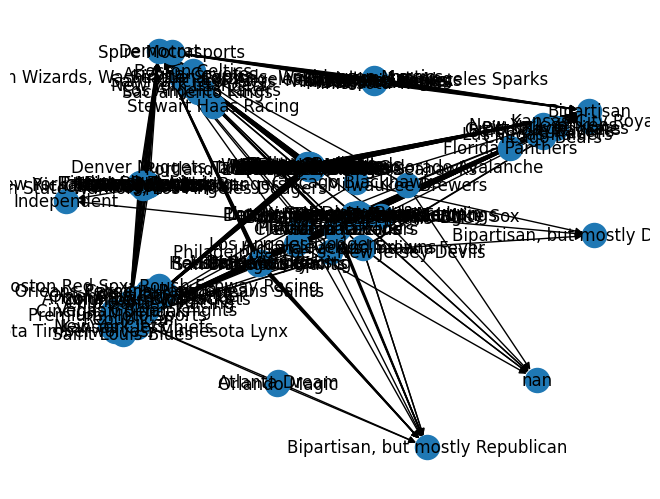

In [17]:
G2 = nx.from_pandas_edgelist(sports_donations, source='Team', target='Party', edge_attr='Amount', create_using=nx.DiGraph())
nx.draw_spring(G2, with_labels = True)

Create the network graph, using teams and recipients as nodes with the edges based on the amounts donated.

In [20]:
G = nx.Graph()
for _, row in sports_donations.iterrows():
    G.add_edge(row['Team'], row['Recipient'], weight=row['Amount'])

In [113]:
nodes_in_graph = list(G.nodes())

Following chapter 3 of the SNA text, I calculated the total degrees, within the network above. I then looked at the node degree for Team = 'Commissioner', as it is the value shown in the head of the data, above.

In [84]:
deg = dict(nx.degree(G))
deg
deg['Commissioner']

21


Next, I took a look at the minimum and maximum degrees in the network
Minimum node degrees = 1
Maximum node degrees = 193

In [46]:
degree_values = [v for k, v in deg]
min(degree_values)
max(degree_values)

193

Based on centrality, we can see the most influential teams in the network are the San Francisco Giants, Chicaco Sky, and Miami Heat.

In [112]:
d_centrality = nx.degree_centrality(G)
sorted_d_centrality = dict(sorted(d_centrality.items(), key=lambda item: item[1], reverse=True))
d_centrality_top10 = dict(list(sorted_d_centrality.items())[:10])
d_centrality_top10

{'Commissioner': 0.01504297994269341, 'WRIGHT 2016': 0.0014326647564469914, 'BIDEN FOR PRESIDENT': 0.007163323782234957, 'CORY 2020': 0.0035816618911174783, 'Kamala Harris for the People': 0.0014326647564469914, 'Win The Era PAC': 0.0007163323782234957, 'KOHL FOR CONGRESS': 0.0035816618911174783, 'BETO FOR TEXAS': 0.002148997134670487, 'MONTANANS FOR TESTER': 0.0050143266475644694, 'SERVE AMERICA PAC': 0.0007163323782234957, 'ADAM SCHLEIFER FOR CONGRESS': 0.0007163323782234957, 'ELISSA SLOTKIN FOR CONGRESS': 0.002148997134670487, 'DELGADO FOR CONGRESS': 0.0007163323782234957, 'Los Angeles Dodgers': 0.025787965616045846, "Americans for Tomorrow's Future": 0.0007163323782234957, 'Stand with Sanchez': 0.0007163323782234957, 'Arizona Coyotes': 0.002148997134670487, 'All For Our Country Leadership PAC ': 0.0007163323782234957, 'Nevadans for Steven Horsford': 0.0007163323782234957, 'Esmeralda Soria for Congress': 0.0007163323782234957, 'Tennessee Titans': 0.002148997134670487, 'Gridiron-PAC'

Based on eigenvector centrality, we can see the San Francisco Giants are once again atop, with the introduction of other nodes in the network, such as "Team Ryan", indicating that fund/campaign probably received donations from many Teams. Further analysis would be required to determine.

In [81]:
e_centrality = nx.eigenvector_centrality(G)
sorted_e_centrality = dict(sorted(e_centrality.items(), key=lambda item: item[1], reverse=True))
e_centrality_top10 = dict(list(sorted_e_centrality.items())[:10])
e_centrality_top10

{'San Francisco Giants': 0.4450848664960701,
 'Orlando Magic': 0.23432871773579297,
 'Cleveland Browns': 0.20794616079644962,
 'Miami Heat': 0.19110733025696608,
 'Arizona Diamondbacks': 0.18316074581787226,
 'Philadelphia 76ers, New Jersey Devils': 0.17616541697624544,
 'Cincinnati Reds': 0.14243953780663868,
 'Portland Trail Blazers, Seattle Seahawks': 0.12319496108665945,
 'TEAM RYAN': 0.11923781921910104,
 'Miami Dolphins': 0.1091490935169099}

A table with total node degrees, degree centrality and eigenvector centrality for each node in the network. A slice of the top 10 nodes, sorted descending on degree centrality is shown and confirms that SF Giants are the most influential in the network of political donations.

In [89]:
degree_table = pd.DataFrame({
    'Node': list(G.nodes()),
    'Degree ': [deg[node] for node in G.nodes()],
    'Degree Centrality': [d_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [e_centrality[node] for node in G.nodes()]
})
degree_table.sort_values(by='Degree Centrality', ascending=False).head(10)

,Node,Degree,Degree Centrality,Eigenvector Centrality
119,San Francisco Giants,193,0.138252,0.445085
588,Chicago Sky,144,0.103152,0.074760
1087,Miami Heat,128,0.091691,0.191107
355,Orlando Magic,93,0.066619,0.234329
762,Cleveland Browns,85,0.060888,0.207946
791,"Portland Trail Blazers, Seattle Seahawks",83,0.059456,0.123195
433,"Philadelphia 76ers, New Jersey Devils",82,0.058739,0.176165
967,Arizona Diamondbacks,81,0.058023,0.183161
705,"Chicago Bulls, Chicago White Sox",68,0.048711,0.076794
1224,Cincinnati Reds,64,0.045845,0.142440


Based on the text "PageRank is scaled between 0 and 1 and represents the likelihood that a person following links (i.e., traversing the network, “surfing” the web, etc) will arrive at a particular page or encounter a particular person. A 0.5 probability is commonly interpreted as a “50% chance” of an event. Hence, a PageRank of 0.5 means there is a 50% chance that a person clicking on a random link will be directed to the document with the 0.5 PageRank.

The main difference lies in the fact that PageRank represents a “flow of trust” or “flow of influence” rather then a more abstract graph-theoretic concept like betweenness. While PageRank computation is local in nature (only immediate neighbors are taken into consideration), its iterative nature allows global influence to propagate through the network."

We can again see the SF giants as the #1 based on page rank, however Right to Rise USA now appears as #2.

In [98]:
pr=nx.pagerank(G)
pr
print(sorted(pr.items(), key=lambda item: item[1], reverse=True))

[('San Francisco Giants', 0.05521697794369145), ('RIGHT TO RISE USA', 0.0235303861728125), ('Chicago Sky', 0.02336505876247077), ('Chicago Bulls, Chicago White Sox', 0.0180021404947982), ('Miami Heat', 0.01735629572401981), ('Orlando Magic', 0.016158988805596464), ('Los Angeles Kings', 0.015239091020134881), ('Cleveland Browns', 0.015034716153399817), ('Arizona Diamondbacks', 0.014892798773921984), ('Milwaukee Bucks', 0.01306287637486326), ('Baltimore Orioles', 0.012618594550268588), ('Chicago Cubs', 0.012584769169588566), ('TRUMP VICTORY', 0.011656184007154706), ('HILLARY VICTORY FUND', 0.011638367872015231), ('TAKE BACK THE HOUSE 2020', 0.010949731033692496), ('SMP', 0.009328813478054514), ('Cincinnati Reds', 0.008868011488485747), ('Philadelphia 76ers, New Jersey Devils', 0.008799484347060895), ('Pittsburgh Penguins', 0.008763709668973923), ('Houston Texans', 0.008685644511088626), ('Indiana Pacers, Indiana Fever', 0.00829986829648693), ('Portland Trail Blazers, Seattle Seahawks', 0

Degree Centrality:
{'Commissioner': 0.01504297994269341, 'WRIGHT 2016': 0.0014326647564469914, 'BIDEN FOR PRESIDENT': 0.007163323782234957, 'CORY 2020': 0.0035816618911174783, 'Kamala Harris for the People': 0.0014326647564469914, 'Win The Era PAC': 0.0007163323782234957, 'KOHL FOR CONGRESS': 0.0035816618911174783, 'BETO FOR TEXAS': 0.002148997134670487, 'MONTANANS FOR TESTER': 0.0050143266475644694, 'SERVE AMERICA PAC': 0.0007163323782234957, 'ADAM SCHLEIFER FOR CONGRESS': 0.0007163323782234957, 'ELISSA SLOTKIN FOR CONGRESS': 0.002148997134670487, 'DELGADO FOR CONGRESS': 0.0007163323782234957, 'Los Angeles Dodgers': 0.025787965616045846, "Americans for Tomorrow's Future": 0.0007163323782234957, 'Stand with Sanchez': 0.0007163323782234957, 'Arizona Coyotes': 0.002148997134670487, 'All For Our Country Leadership PAC ': 0.0007163323782234957, 'Nevadans for Steven Horsford': 0.0007163323782234957, 'Esmeralda Soria for Congress': 0.0007163323782234957, 'Tennessee Titans': 0.002148997134670

Compare centrality measures for NFL and MLB

With the pvalues below 0.05, we can accept the null hypthosis that there is a significant difference in donations between the NFL and MLB, favoring the MLB given the negative value in the t-statistic.

In [120]:
nfl_d_centrality = [d_centrality[team] for team in sports_donations['Team'] if sports_donations[sports_donations['Team'] == team]['League'].iloc[0] == 'NFL']
mlb_d_centrality = [d_centrality[team] for team in sports_donations['Team'] if sports_donations[sports_donations['Team'] == team]['League'].iloc[0] == 'MLB']

t_stat_degree, p_value_degree = ttest_ind(nfl_d_centrality, mlb_d_centrality, equal_var=False)
print("T-test for Degree Centrality between NFL and MLB:")
print("T-statistic:", t_stat_degree)
print("P-value:", p_value_degree)


T-test for Degree Centrality between NFL and MLB:
T-statistic: -15.097211893379411
P-value: 5.86840003267185e-47
